### collaborative filtering, where user-to-user

## Part 1

In [ ]:
# importing necessary libraries
import pandas as pd # to read data from a file
import numpy as np # to perform computations

In [16]:
# Use the read_csv function to store the dataset into a dataframe called ratings
ratings = pd.read_csv('/content/ccai422_lab03_part1_data (1).csv')

# Display the first 5 rows of the dataframe
ratings.head()

,Unnamed: 0,user_id,movie_id,rating
0,0,196,242,3
1,1,186,302,3
2,2,22,377,1
3,3,244,51,2
4,4,166,346,1


In [17]:
# Keep only the columns that we need in this task: "user_id", "movie_id" and "rating"
ratings = ratings[["user_id", "movie_id", "rating"]]

In [18]:
# The total number of data points
#len(ratings) returns the number of rows in the ratings DataFrame, which represents the total number of data points (each row could represent a rating)
#str() converts the result into a string so it can be concatenated with the rest of the message or for printing
print('The number of data points in this dataset: ' + str(len(ratings)))

# The number of items (i.e. movies) in the dataset
#ratings['movie_id'] accesses the 'movie_id' column of the DataFrame, .nunique() counts the number of unique values in the 'movie_id'
print('The number of items (i.e. movies) in the dataset: ' + str(ratings['movie_id'].nunique()))

# The number of users in the dataset
print('The number of users in the dataset: ' + str(ratings['user_id'].nunique()))

# The average ratings per user
#.groupby('user_id') groups the rows according to the user, .count() counts the number of ratings (or entries) for each user.
# This creates a new DataFrame where each user is listed along with how many ratings they have given.
ratings_per_users = ratings.groupby('user_id').count()

#This line calculates the average number of ratings given by each user.
#ratings_per_users.mean() computes the mean of the counts of ratings for each user (i.e., the average number of ratings per user).
print('The average ratings per user: '+ str(round(ratings_per_users.mean()[0],2)))

# The number of ratings/user
print('The below table shows the number of ratings per user\n')
print(ratings_per_users)

The number of data points in this dataset: 100000
The number of items (i.e. movies) in the dataset: 1682
The number of users in the dataset: 943
The average ratings per user: 106.04
The below table shows the number of ratings per user

         movie_id  rating
user_id                  
1             272     272
2              62      62
3              54      54
4              24      24
5             175     175
...           ...     ...
939            49      49
940           107     107
941            22      22
942            79      79
943           168     168

[943 rows x 2 columns]


<ipython-input-18-3f99117e7fef>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The average ratings per user: '+ str(round(ratings_per_users.mean()[0],2)))


In [19]:
#Build the ratings matrix using pivot_table function, This line creates a ratings matrix using the pivot_table() function from the ratings DataFrame.
#values='rating': Specifies that the 'rating' column will be the values in the matrix
#index='user_id': Rows of the matrix will be indexed by 'user_id', meaning each row will represent a user.
#columns='movie_id': Columns of the matrix will represent 'movie_id', meaning each column corresponds to a movie.
#The resulting matrix, r_matrix, will contain users as rows, movies as columns, and the corresponding rating that each user gave to a movie as the value in the matrix.
#If a user hasn’t rated a movie, the cell will contain NaN.
r_matrix = ratings.pivot_table(values='rating', index='user_id', columns='movie_id')

#Create a dummy ratings matrix which will have all null values imputed to 0,  creates a copy of the original ratings matrix
#Copying is done to preserve the original r_matrix as we will modify r_matrix_dummy in subsequent steps.
r_matrix_dummy = r_matrix.copy()

#rename the axis of the new matrix
#rename_axis('user_id', axis=1): Renames the column axis to 'user_id'. However, this might be redundant or unnecessary because the column axis corresponds to 'movie_id'.
#It’s possible this is intended to give clarity or avoid confusion.
#rename_axis(None, axis=0): Removes the index name from the row axis, making the row axis unnamed.
#Since the index represents users, this step removes any explicit name that might have been there.
r_matrix_dummy = r_matrix_dummy.rename_axis('user_id', axis=1).rename_axis(None, axis=0)

# Impute all the NaN values to 0
r_matrix_dummy = r_matrix_dummy.fillna(0)
r_matrix_dummy.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Get the transpose of rating matrix to compute the pearson correlation between the users not the items
#Before transposing: rows represent users (user_id), and columns represent movies (movie_id).
#After transposing: rows now represent movies, and columns represent users.
#making it suitable for calculating user-to-user correlations
users_rating_matrix = r_matrix_dummy.T
users_rating_matrix

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Use the corr function of pandas to compute the pearson correlation on the users_ratings_matrix
pearson_sim = users_rating_matrix.corr()
#A value of 1 indicates perfect correlation (users rate similarly),
#-1 indicates perfect negative correlation (users rate oppositely), and 0 indicates no correlation between their ratings.

In [22]:
# Randomly select a user to rate an item for him/her, user with ID 5
userX= 5

# Get the rating data of the specified user and compute the mean value
#This line calculates the mean rating of the selected user (userX).
#r_matrix[userX] retrieves all the ratings given by user 5.
#.mean() computes the average of all ratings that user 5 has given to the movies. This gives a general idea of the user’s rating behavior.
rXmean=r_matrix[userX].mean()

# Specify the n neighbors to be used in the prediction, top 2 most similar users (neighbors) to make rating predictions for user 5.
n = 2

# Retrieve the top n based on the pearson sim (ignore the first one since it is the item with itself)
#pearson_sim[[userX]] retrieves the Pearson similarity values between user 5 and all other users.
#.nlargest(n+1, userX) selects the n+1 largest values, including user 5 (which will always have a perfect similarity with themselves, i.e., 1). Adding 1 accounts for removing the self-comparison.
#.index.tolist()[1:] gets the user IDs of the top n most similar users, excluding the first one
#topn, which contains the user IDs of the top n most similar users.
topn = pearson_sim[[userX]].nlargest(n+1,userX).index.tolist()[1:]

# Retrieve the similarity values to be used
neighbors_sim = pearson_sim[[userX]].nlargest(n+1,userX)[1:] #selects the n+1 largest Pearson similarity values, excludes the similarity value for user 5 themselves
#The result is stored in neighbors_sim, which contains the Pearson similarity values for the top n users.

# Get the rating data for the top n neighbors
#r_matrix[topn] selects the rows of the r_matrix corresponding to the users in topn (the most similar users).
#The result is stored in r_matrix_topn, which now contains the ratings given by the top n similar users to different movies.
r_matrix_topn = r_matrix[topn]

# Compute the mean rating's value per neighbor, .mean() calculates the average rating given by each user (neighbor) across all the movies.
#The result is stored in neighbors_means, which represents the average rating each of the top n users has given to the movies.
neighbors_means = r_matrix_topn.mean()

# Compute the differences between the mean rating's value per user and his/her actual ratings
#.sub(neighbors_means, axis=1) subtracts the mean rating of each neighbor (from neighbors_means) from their actual ratings in r_matrix_topn.
#The subtraction is done across columns (since axis=1), meaning that for each user (neighbor), their mean rating is subtracted from every movie rating they have given.
averaged_neighbors_ratings = r_matrix_topn.sub(neighbors_means,axis=1)

In [23]:
# Select all unrated items for the target user, This line selects unrated items for the target user (userX), which are the movies the user hasn’t rated yet.
#r_matrix[userX].isna() creates a boolean mask that is True for all movies that user 5 has not rated
#r_matrix[r_matrix[userX].isna()] selects the rows (movies) that the target user hasn’t rated.
#[topn] selects the columns corresponding to the top n similar users (neighbors),restricting the matrix to just the ratings given by those users for the movies user 5 hasn’t rated.
unrated_target = r_matrix[r_matrix[userX].isna()][topn] #The result, unrated_target, is a matrix where the rows represent movies that user 5 hasn’t rated, and the columns represent the top n users and their ratings for those movies.

# rename the axis of the unrated item matrix
#rename_axis('movie_id', axis=1) renames the column axis to 'movie_id', indicating that the columns represent movies.
#rename_axis(None, axis=0) removes the index name for the row axis, leaving it unnamed.
unrated_target = unrated_target.rename_axis('movie_id', axis=1).rename_axis(None, axis=0)

# Remove items that are not rated by all top n neighbors
#This line removes rows (movies) from the unrated_target matrix if none of the top n users have rated that movie.
#dropna(axis=0, how='all') drops rows (movies) where all values are NaN, meaning none of the top n neighbors have rated that movie.
#inplace=True ensures that the changes are applied directly to the unrated_target matrix without needing to assign the result to a new variable.
unrated_target.dropna(axis = 0, how = 'all', inplace = True)


unrated_target.head()

movie_id,307,22
2,3.0,NaN
3,3.0,NaN
6,NaN,3.0
7,5.0,5.0
8,NaN,5.0


In [24]:
# Randomly select the item to be rated
itemX = 7 # movie with ID 7

# Predict the rating value for the unrated item "predict user 5's rating for movie 7"
# rXmean: This is the mean rating of the target user (user 5)
# averaged_neighbors_ratings.loc[itemX] retrieves the mean ratings for movie 7,

# neighbors_sim.T transposes the similarity values for the neighbors (now it's a row vector), .dot calculates the similarity values between user 5 and the top n neighbors.
#values[0]: This extracts the scalar result from the dot product operation (as it might be returned as an array or a pandas structure).
#This calculates the sum of the similarity values for the top n neighbors.
#The final result is the predicted rating for user 5 on movie 7, which is computed as:
#1-User 5's mean rating (rXmean),
#2-Plus the weighted sum of rating differences from the top n neighbors,
#3-Divided by the total similarity to ensure the prediction is weighted fairly.
predicted_value = rXmean + ((neighbors_sim.T.dot(averaged_neighbors_ratings.loc[itemX].T).values[0]) / neighbors_sim.sum())


## Part 2

In [25]:
#1.	Import pandas and numpy libraries
import pandas as pd
import numpy as np

In [26]:
#2.	Upload the dataset file that is provided on the Blackboard and show its content
#3.	Use the read_csv function to assign the data to a dataframe called user_item_df
#4.	Display the user_item_df dataframe content using the head function

user_item_df=pd.read_csv('/content/ccai422_lab03_part2_data (1).csv')
user_item_df.head()

,Unnamed: 0,Alice,User1,User2,User3,User4
0,item1,5.0,3,4,3,1
1,item2,3.0,1,3,3,5
2,item3,4.0,2,4,1,5
3,item4,4.0,3,3,5,2
4,item5,NaN,3,5,4,1


In [27]:
# Keep only the columns that we need in this task: "Alice, User1, User2, User3, User4"
user_item_df= user_item_df[["Alice", "User1", "User2", "User3", "User4"]]
user_item_df

,Alice,User1,User2,User3,User4
0,5.0,3,4,3,1
1,3.0,1,3,3,5
2,4.0,2,4,1,5
3,4.0,3,3,5,2
4,NaN,3,5,4,1


In [28]:
# Task 5 and 6: Applying the Pearson correlation using pandas corr function and assign the result to a dataframe
user_item_corr = user_item_df.corr()

In [29]:
user_item_corr.head()

,Alice,User1,User2,User3,User4
Alice,1.000000,0.852803,0.707107,0.000000,-0.792118
User1,0.852803,1.000000,0.467707,0.489956,-0.900149
User2,0.707107,0.467707,1.000000,-0.161165,-0.466569
User3,0.000000,0.489956,-0.161165,1.000000,-0.641503
User4,-0.792118,-0.900149,-0.466569,-0.641503,1.000000


In [30]:
# Task 7: Identifying Alice's top two neighbors
alice_corr = user_item_corr['Alice'].nlargest(3)
neighbors = alice_corr.index[1:] #removes alice corr with itself which=1
print(neighbors)

Index(['User1', 'User2'], dtype='object')


In [31]:
# a. Calculate Alice's mean rating
ra = user_item_df['Alice'].mean()

In [32]:
# b. Extracting the ratings for Item 5 from Alice's top two neighbors"User 1 and User 2"
#looks for the row where the index equals 4, which corresponds to Item 5
#.values[0] is used to extract the first (and only) value from the result
rb_p_user1 = user_item_df.loc[user_item_df.index == 4, 'User1'].values[0]
rb_p_user2 = user_item_df.loc[user_item_df.index == 4, 'User2'].values[0]
print(rb_p_user1," ",rb_p_user2)

3   5


In [33]:
# c. Calculate the mean ratings for User1 and User2
rb_user1 = user_item_df['User1'].mean()
rb_user2 = user_item_df['User2'].mean()

print(rb_user1," ",rb_user2)

2.4   3.8


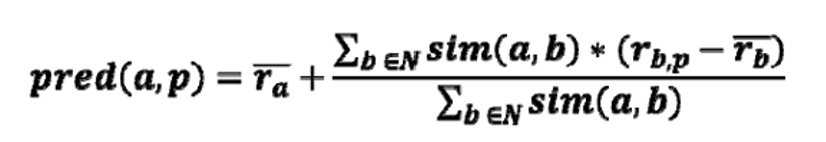

In [34]:
# Task 9: Applying the prediction formula
sim_user1 = user_item_corr.loc['Alice', 'User1']
sim_user2 = user_item_corr.loc['Alice', 'User2']

numerator = (sim_user1 * (rb_p_user1 - rb_user1)) + (sim_user2 * (rb_p_user2 - rb_user2))
denominator = sim_user1 + sim_user2

In [35]:
# Task 10: Printing the predicted rating for Item 5 for Alice
pred = ra + (numerator / denominator)
print(pred)

4.871979899370592


#1.	Use python to implement the Pearson correlation.

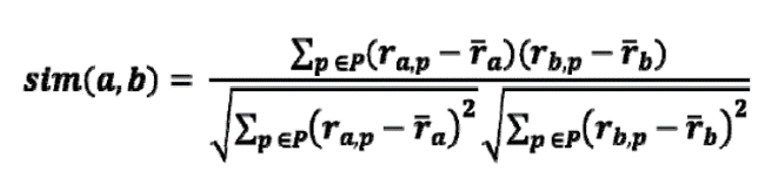

In [54]:
def pearson_correlation(user1, user2, df):
    # Get the common items rated by both users
    #This line finds the items that both users have rated.
    #The condition df[user1].notnull() & df[user2].notnull() checks for the rows where both user1 and user2 have non-null (valid) ratings.
    common_items = df[df[user1].notnull() & df[user2].notnull()].index


    # Get the ratings for the common items
    r1 = df.loc[common_items, user1] #r1 holds the ratings given by user1 for the common items
    r2 = df.loc[common_items, user2] #r2 holds the ratings given by user2 for the common items

    # calculates the average rating for the common items for each user.
    r1_mean = r1.mean()
    r2_mean = r2.mean()

    # Calculate the numerator and denominator for Pearson correlation
    numerator = sum((r1 - r1_mean) * (r2 - r2_mean))
    denominator = np.sqrt(sum((r1 - r1_mean) ** 2)) * np.sqrt(sum((r2 - r2_mean) ** 2))



    return numerator / denominator

# 2.	Use the prediction formula that you built in the first part to predict the rating for Alice’s Item5. Use your implementation in task1 of this part2 to retrieve the sim(a,b) values.

In [55]:
corr_user1_user2 = pearson_correlation(1, 2, r_matrix)
corr_user1_user3 = pearson_correlation(1, 3, r_matrix)

In [56]:
corr_user1_user2, corr_user1_user3

(0.2217841101879715, 0.17579429803514818)

In [57]:
# test it on the built in function to compare the results
r_matrix.corr()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.221784,0.175794,0.103135,0.386475,0.529401,0.159248,0.247367,0.090176,0.187502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.221784,1.000000,0.230536,0.244556,0.217559,-0.158114,0.175445,0.340525,-0.227599,0.199083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.175794,0.230536,1.000000,-0.201969,0.184612,0.806226,0.071509,-0.118587,0.016742,0.071563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.103135,0.244556,-0.201969,1.000000,-0.237350,0.066625,0.152733,0.281270,0.208459,0.231931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.386475,0.217559,0.184612,-0.237350,1.000000,1.000000,0.180211,0.205114,0.065169,-0.843661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## 3.	Confirm that the predicted value in this part is equal to the one produced in the previous one.

In [58]:
alice_user1_corr = pearson_correlation('Alice', 'User1', user_item_df)
alice_user2_corr = pearson_correlation('Alice', 'User2', user_item_df)

In [59]:
print(alice_user1_corr,alice_user2_corr)


0.8528028654224417 0.7071067811865475


In [60]:
sim_a_user1 = alice_user1_corr
sim_a_user2 = alice_user2_corr

In [61]:
numerator = (sim_a_user1 * (rb_p_user1 - rb_user1)) + (sim_a_user2 * (rb_p_user2 - rb_user2))
denominator = sim_a_user1 + sim_a_user2

In [62]:
pred_a_p_manual = ra + (numerator / denominator)
print(pred_a_p_manual)

4.871979899370592


# The End
      .-""""-.
     / -    - \
    |  O    O  |
    |     >    |
     \  \__/  /
      `-.....-`
                /
        /|\\   /
        / | \\/
          |
        / \\
        /   \
